In [1]:
import datetime as dt
import itertools
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings

from IPython.display import display
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from typing import List, Set

pd.set_option("display.float_format", "{:.4f}".format)
pd.set_option("display.max_columns", None)

warnings.filterwarnings("ignore")

In [2]:
df: pd.DataFrame = pd.read_csv(
    "Resources/dataset_1.csv",
    header=None,
    names=["products"]
)

print(df.shape)
display(df)

(20, 1)


,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [3]:
data: List[List[str]] = list(df["products"].apply(lambda x: x.split(",")))

te: TransactionEncoder = TransactionEncoder()
te_data: np.ndarray = te.fit(data).transform(data)

df = pd.DataFrame(te_data, columns=te.columns_).astype(int)

display(df)

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


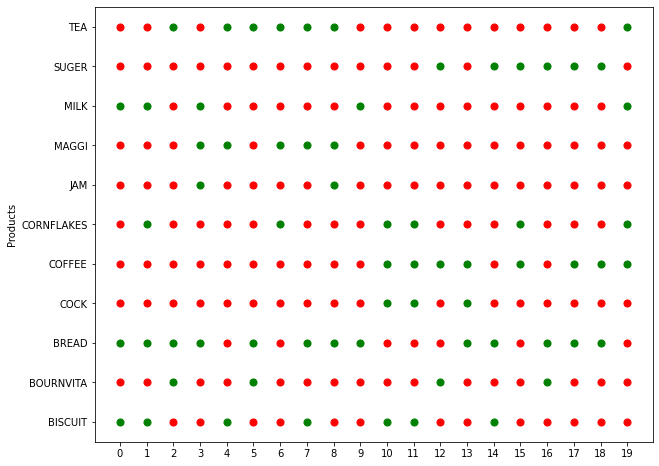

In [4]:
fig: Figure; ax: Axes
fig, ax = plt.subplots(figsize=(10, 8))

for col_idx, col_name in enumerate(df.columns):
    for row_idx, value in enumerate(df[col_name]):
        if value == 1:
            ax.scatter(row_idx, col_idx, color="green", s=50)
        else:
            ax.scatter(row_idx, col_idx, color="red", s=50)

ax.set_ylabel("Products")
ax.set_xticks(np.arange(len(df)))
ax.set_yticks(np.arange(len(df.columns)))
ax.set_yticklabels(df.columns)

plt.show()

In [5]:
freq_items: pd.DataFrame = apriori(
    df,
    min_support=0.1,
    use_colnames=True,
    max_len=None,
    verbose=1,
    low_memory=False
).sort_values("support", ascending = False)
    
display(freq_items)

Processing 108 combinations | Sampling itemset size 4


,support,itemsets
2,0.6500,(BREAD)
4,0.4000,(COFFEE)
0,0.3500,(BISCUIT)
10,0.3500,(TEA)
5,0.3000,(CORNFLAKES)
9,0.3000,(SUGER)
7,0.2500,(MAGGI)
8,0.2500,(MILK)
30,0.2000,"(COFFEE, SUGER)"
34,0.2000,"(MAGGI, TEA)"


In [6]:
asc_rules: pd.DataFrame = association_rules(
    freq_items,
    metric = "confidence",
    min_threshold = 0.5
).sort_values("confidence", ascending=False)

pd.set_option("display.max_rows", None)
display(asc_rules)
pd.set_option("display.max_rows", 10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(JAM),"(MAGGI, BREAD)",0.1000,0.1500,0.1000,1.0000,6.6667,0.0850,inf
35,"(TEA, BISCUIT)",(MAGGI),0.1000,0.2500,0.1000,1.0000,4.0000,0.0750,inf
58,"(BISCUIT, CORNFLAKES, COCK)",(COFFEE),0.1000,0.4000,0.1000,1.0000,2.5000,0.0600,inf
57,"(COFFEE, BISCUIT, COCK)",(CORNFLAKES),0.1000,0.3000,0.1000,1.0000,3.3333,0.0700,inf
56,"(COFFEE, CORNFLAKES, BISCUIT)",(COCK),0.1000,0.1500,0.1000,1.0000,6.6667,0.0850,inf
31,"(TEA, BOURNVITA)",(BREAD),0.1000,0.6500,0.1000,1.0000,1.5385,0.0350,inf
55,"(COFFEE, CORNFLAKES, COCK)",(BISCUIT),0.1000,0.3500,0.1000,1.0000,2.8571,0.0650,inf
34,"(MAGGI, BISCUIT)",(TEA),0.1000,0.3500,0.1000,1.0000,2.8571,0.0650,inf
54,(JAM),(BREAD),0.1000,0.6500,0.1000,1.0000,1.5385,0.0350,inf
23,"(MAGGI, JAM)",(BREAD),0.1000,0.6500,0.1000,1.0000,1.5385,0.0350,inf


In [7]:
asc_rules[(asc_rules.support > 0.15) & (asc_rules.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(MAGGI),(TEA),0.2500,0.3500,0.2000,0.8000,2.2857,0.1125,3.2500
9,(MILK),(BREAD),0.2500,0.6500,0.2000,0.8000,1.2308,0.0375,1.7500
6,(CORNFLAKES),(COFFEE),0.3000,0.4000,0.2000,0.6667,1.6667,0.0800,1.8000
8,(SUGER),(BREAD),0.3000,0.6500,0.2000,0.6667,1.0256,0.0050,1.0500
1,(SUGER),(COFFEE),0.3000,0.4000,0.2000,0.6667,1.6667,0.0800,1.8000
7,(TEA),(BREAD),0.3500,0.6500,0.2000,0.5714,0.8791,-0.0275,0.8167
4,(BISCUIT),(BREAD),0.3500,0.6500,0.2000,0.5714,0.8791,-0.0275,0.8167
3,(TEA),(MAGGI),0.3500,0.2500,0.2000,0.5714,2.2857,0.1125,1.7500


## Pattern Mining Assignment

In [8]:
df = pd.read_csv("Resources/dataset_2.csv")

print(df.shape)
display(df)

(4627, 217)


,department1,department2,department3,department4,department5,department6,department7,department8,department9,'grocery misc',department11,'baby needs','bread and cake','baking needs',coupons,juice-sat-cord-ms,tea,biscuits,'canned fish-meat','canned fruit','canned vegetables','breakfast food','cigs-tobacco pkts','cigarette cartons',cleaners-polishers,coffee,sauces-gravy-pkle,confectionary,puddings-deserts,dishcloths-scour,deod-disinfectant,'frozen foods','razor blades','fuels-garden aids',spices,jams-spreads,insecticides,'pet foods','laundry needs','party snack foods','tissues-paper prd',wrapping,'dried vegetables','pkt-canned soup','soft drinks','health food other','beverages hot','health&beauty misc',deodorants-soap,'mens toiletries',medicines,haircare,'dental needs',lotions-creams,'sanitary pads',cough-cold-pain,department57,'meat misc',cheese,chickens,milk-cream,cold-meats,'deli gourmet',margarine,salads,'small goods','dairy foods','fruit drinks','delicatessen misc',department70,beef,hogget,lamb,'pet food',pork,poultry,veal,'gourmet meat',department79,department80,department81,'produce misc',fruit,plants,potatoes,vegetables,flowers,department88,department89,'variety misc',brushware,electrical,haberdashery,kitchen,manchester,pantyhose,plasticware,department98,stationary,department100,department101,department102,'prepared meals','preserving needs',condiments,'cooking oils',department107,department108,department109,department110,department111,department112,department113,department114,'health food bulk',department116,department117,department118,department119,department120,'bake off products',department122,department123,department124,department125,department126,department127,department128,department129,department130,'small goods2',offal,mutton,'trim pork','trim lamb','imported cheese',department137,department138,department139,department140,department141,department142,department143,department144,department145,department146,department147,department148,department149,department150,department151,department152,department153,department154,department155,department156,department157,department158,department159,department160,department161,department162,department163,department164,department165,department166,department167,department168,department169,department170,department171,department172,department173,department174,department175,department176,department177,department178,department179,'casks white wine','casks red wine','750ml white nz','750ml red nz','750ml white imp','750ml red imp','sparkling nz','sparkling imp','brew kits/accesry',department189,'port and sherry','ctrled label wine',department192,department193,department194,department195,department196,department197,department198,department199,'non host support',department201,department202,department203,department204,department205,department206,department207,department208,department209,department210,department211,department212,department213,department214,department215,department216,total
0,?,?,?,?,?,?,?,?,?,?,?,t,t,t,?,t,?,t,?,?,t,?,?,?,t,t,t,t,?,t,?,t,t,?,?,?,?,?,?,t,t,t,?,?,?,?,?,?,?,t,?,?,?,?,?,?,?,?,t,?,t,?,?,t,?,t,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,t,?,?,t,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,t,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,t,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,high
1,t,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,t,t,t,?,?,?,?,?,t,?,?,?,t,t,?,?,?,?,?,t,t,?,t,?,?,?,?,?,?,?,t,?,?,t,?,?,?,?,?,?,?,?,t,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,t,?,?,t,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,low
2,?,?,?,?,?,?,?,?,?,?,?,?,t,t,?,t,?,t,?,t,?,?,?,?,?,?,t,?,t,?,?,?,?,?,?,?,?,?,?,?,?,t,?,?,?,t,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,t,t,?,?,?,

In [9]:
pd.set_option("display.max_rows", None)
print(df.dtypes)
pd.set_option("display.max_rows", 10)

department1             object
department2             object
department3             object
department4             object
department5             object
department6             object
department7             object
department8             object
department9             object
'grocery misc'          object
department11            object
'baby needs'            object
'bread and cake'        object
'baking needs'          object
coupons                 object
juice-sat-cord-ms       object
tea                     object
biscuits                object
'canned fish-meat'      object
'canned fruit'          object
'canned vegetables'     object
'breakfast food'        object
'cigs-tobacco pkts'     object
'cigarette cartons'     object
cleaners-polishers      object
coffee                  object
sauces-gravy-pkle       object
confectionary           object
puddings-deserts        object
dishcloths-scour        object
deod-disinfectant       object
'frozen foods'          object
'razor b

In [10]:
symbols: Set[str] = set()
for col in df.columns[:-1]:
    symbols.update(df[col].unique())
    
print(symbols)

{'?', 't'}


In [11]:
df.replace({"?": 0, "low": 0, "t": 1, "high": 1}, inplace=True)

display(df)

,department1,department2,department3,department4,department5,department6,department7,department8,department9,'grocery misc',department11,'baby needs','bread and cake','baking needs',coupons,juice-sat-cord-ms,tea,biscuits,'canned fish-meat','canned fruit','canned vegetables','breakfast food','cigs-tobacco pkts','cigarette cartons',cleaners-polishers,coffee,sauces-gravy-pkle,confectionary,puddings-deserts,dishcloths-scour,deod-disinfectant,'frozen foods','razor blades','fuels-garden aids',spices,jams-spreads,insecticides,'pet foods','laundry needs','party snack foods','tissues-paper prd',wrapping,'dried vegetables','pkt-canned soup','soft drinks','health food other','beverages hot','health&beauty misc',deodorants-soap,'mens toiletries',medicines,haircare,'dental needs',lotions-creams,'sanitary pads',cough-cold-pain,department57,'meat misc',cheese,chickens,milk-cream,cold-meats,'deli gourmet',margarine,salads,'small goods','dairy foods','fruit drinks','delicatessen misc',department70,beef,hogget,lamb,'pet food',pork,poultry,veal,'gourmet meat',department79,department80,department81,'produce misc',fruit,plants,potatoes,vegetables,flowers,department88,department89,'variety misc',brushware,electrical,haberdashery,kitchen,manchester,pantyhose,plasticware,department98,stationary,department100,department101,department102,'prepared meals','preserving needs',condiments,'cooking oils',department107,department108,department109,department110,department111,department112,department113,department114,'health food bulk',department116,department117,department118,department119,department120,'bake off products',department122,department123,department124,department125,department126,department127,department128,department129,department130,'small goods2',offal,mutton,'trim pork','trim lamb','imported cheese',department137,department138,department139,department140,department141,department142,department143,department144,department145,department146,department147,department148,department149,department150,department151,department152,department153,department154,department155,department156,department157,department158,department159,department160,department161,department162,department163,department164,department165,department166,department167,department168,department169,department170,department171,department172,department173,department174,department175,department176,department177,department178,department179,'casks white wine','casks red wine','750ml white nz','750ml red nz','750ml white imp','750ml red imp','sparkling nz','sparkling imp','brew kits/accesry',department189,'port and sherry','ctrled label wine',department192,department193,department194,department195,department196,department197,department198,department199,'non host support',department201,department202,department203,department204,department205,department206,department207,department208,department209,department210,department211,department212,department213,department214,department215,department216,total
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1

In [12]:
freq_items = apriori(
    df,
    min_support=0.1,
    use_colnames=True,
    max_len=None,
    verbose=1,
    low_memory=False
).sort_values("support", ascending = False)
    
display(freq_items)

Processing 88 combinations | Sampling itemset size 8 765


,support,itemsets
2,0.7197,('bread and cake')
39,0.6402,(fruit)
41,0.6399,(vegetables)
30,0.6352,(milk-cream)
3,0.6041,('baking needs')
...,...,...
9372,0.1001,"(milk-cream, fruit, 'pet foods', 'frozen foods..."
6894,0.1001,"('tissues-paper prd', 'soft drinks', margarine..."
5450,0.1001,"(juice-sat-cord-ms, beef, 'frozen foods', sauc..."
8903,0.1001,"(milk-cream, fruit, 'baking needs', cheese, 't..."


In [13]:
asc_rules = association_rules(
    freq_items,
    metric = "confidence",
    min_threshold = 0.5
).sort_values("confidence", ascending=False)

display(asc_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
57770,"(total, fruit, 'party snack foods', vegetables...",('bread and cake'),0.1102,0.7197,0.1033,0.9373,1.3023,0.0240,4.4675
68767,"(total, fruit, cheese, biscuits, 'frozen foods')",('bread and cake'),0.1070,0.7197,0.1001,0.9354,1.2997,0.0231,4.3361
57493,"(total, fruit, vegetables, cheese, biscuits)",('bread and cake'),0.1109,0.7197,0.1035,0.9337,1.2974,0.0237,4.2294
37639,"(total, fruit, 'party snack foods', 'baking ne...",('bread and cake'),0.1204,0.7197,0.1124,0.9336,1.2972,0.0257,4.2198
54948,"(total, fruit, 'baking needs', vegetables, che...",('bread and cake'),0.1122,0.7197,0.1044,0.9306,1.2931,0.0237,4.0412
...,...,...,...,...,...,...,...,...,...
14264,"('party snack foods', 'baking needs', 'bread a...","(biscuits, sauces-gravy-pkle)",0.2710,0.3039,0.1355,0.5000,1.6454,0.0532,1.3923
34255,"(fruit, 'frozen foods', margarine)","(cheese, 'bread and cake')",0.2287,0.3225,0.1143,0.5000,1.5506,0.0406,1.3551
49540,"(total, biscuits, 'baking needs')","(juice-sat-cord-ms, 'bread and cake', vegetables)",0.2131,0.2859,0.1065,0.5000,1.7487,0.0456,1.4281
26951,"(total, 'bread and cake', vegetables)","(biscuits, fruit, 'tissues-paper prd')",0.2399,0.2313,0.1199,0.5000,2.1621,0.0645,1.5375


In [23]:
tmp: pd.DataFrame = asc_rules[(asc_rules.support > 0.2) & (asc_rules.confidence > 0.5)].sort_values("confidence", ascending = False)

pd.set_option("display.max_rows", None)
display(tmp)
pd.set_option("display.max_rows", 10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1863,"(biscuits, fruit, 'frozen foods', vegetables)",('bread and cake'),0.2246,0.7197,0.2008,0.8941,1.2424,0.0392,2.6477
1766,"(total, fruit, vegetables)",('bread and cake'),0.2269,0.7197,0.2027,0.8933,1.2413,0.0394,2.6279
742,"(total, fruit)",('bread and cake'),0.2686,0.7197,0.2386,0.8882,1.2341,0.0453,2.5067
849,"(total, biscuits)",('bread and cake'),0.2654,0.7197,0.2338,0.8811,1.2243,0.0428,2.3577
914,"(total, milk-cream)",('bread and cake'),0.2630,0.7197,0.2315,0.8800,1.2228,0.0422,2.3366
659,"(total, 'frozen foods')",('bread and cake'),0.2751,0.7197,0.2414,0.8775,1.2192,0.0434,2.2874
1758,"(biscuits, fruit, margarine)",('bread and cake'),0.2319,0.7197,0.2027,0.8742,1.2147,0.0358,2.2280
1288,"(total, 'party snack foods')",('bread and cake'),0.2421,0.7197,0.2116,0.8741,1.2146,0.0374,2.2266
726,"(total, vegetables)",('bread and cake'),0.2745,0.7197,0.2399,0.8740,1.2144,0.0424,2.2250
580,"(biscuits, 'frozen foods', fruit)",('bread and cake'),0.2829,0.7197,0.2470,0.8732,1.2133,0.0434,2.2104
